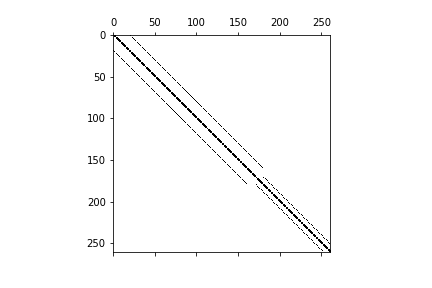

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import math



h = 1.0 / 20
N1 = int(0.5 / h - 1)
N2 = int(0.5 / h)

M1 = int(1 / h - 1)
M2 = int(0.5 / h - 1)

x = np.linspace(-1, 1, int(1 / h) + 1)
y = np.linspace(1, -1, int(1 / h) + 1)


def get_index(m, n):
    if (n > N1):
        return N1 * M1 + (n - N1 - 1) * M2 + m - 1
    else:
        return (n - 1) * M1 + m - 1

def isInZone(n, m):
    if (n < 1 or m < 1):
        return False
    if (n <= N1 and m > M1):
        return False
    if (n > N1 and m > M2):
        return False
    if (m > M2 and n > N1):
        return False
    if (m <= M2 and n > N1 + N2):
        return False
    
    return True

def isBetween(k, a, b):
    if (k <= b and k >= b):
        return True
    else:
        return False
    
def calcA(m):
    return (x[m]**2 + 1) / 10

def calcDerivedA(m):
    return x[m] / 5


finalN = N1 * M1 + N2 * M2
matrix = np.zeros((finalN, finalN))

delta = [[0, 1],
         [0, -1],
         [1, 0],
         [-1, 0]]

# Build matrix
for n in range(1, N1 + N2 + 1):
    MBorder = (M1 if n <= N1 else M2) + 1
    
    for m in range(1, MBorder):
        lineNum = get_index(m, n)
        for i in range(4):
            curM = m + delta[i][0]
            curN = n + delta[i][1]
            if (isInZone(curM, curN)):
                matrix[lineNum][get_index(curM, curN)] = calcA(curM) / h**2
            
            matrix[lineNum][get_index(m, n)] = -4 * calcA(m) / h**2
            
            if (isInZone(m + 1, n)):
                matrix[lineNum][get_index(m + 1, n)] += calcDerivedA(m) / (2 * h)
            if (isInZone(m - 1, n)):
                matrix[lineNum][get_index(m - 1, n)] -= calcDerivedA(m) / (2 * h)
                
%matplotlib inline
%matplotlib widget
plt.spy(matrix)
# plt.show()
plt.savefig("spy.eps")



## Текст
Текст

In [2]:
def get_MJ (matrix, f):   # r - discrepancy
    n = np.size(f)
    u = np.zeros(n)
    uNext = np.zeros(n)
    rs = [1]
    eps = 1e-6
    while rs[-1] > eps:
        for i in range (n):
            uNext[i] = (f[i] - matrix[i][:i] @ u[:i] - matrix[i][i + 1:] @ u[i + 1:]) / matrix[i][i] 
        u = uNext
        rs.append(np.max(np.abs(matrix @ (u) - f)) / np.max(np.abs(f)))
    print("cnt", len(rs))
    print("r", rs[-1])
    return u, rs


def get_MZ (matrix, f):   # r - discrepancy
    n = np.size(f)
    u = np.zeros(n)
    uNext = np.zeros(n)
    rs = [1]
    eps = 1e-6
    while rs[-1] > eps:
        for i in range (n):
            uNext[i] = (f[i] - 
                        matrix[i][:i] @ (uNext[:i]) - 
                        matrix[i][i + 1:] @ (u[i + 1:])) / matrix[i][i]  
        u = uNext
        rs.append(np.max(np.abs(matrix @ (u) - f)) / np.max(np.abs(f)))
    print("cnt", len(rs))
    print("r", rs[-1])
    return u, rs

def get_heterogeneity_vector(left, right, bottom, top, func):   #func from m and n - indexes along axes
    vector = np.zeros(finalN)
    for m in range(left, right + 1):
        for n in range(bottom, top + 1):
            vector[get_index(m, n)] = func(m, n)
    return vector
    
left = 2
right = 9
bottom = 2
top = 15

func = lambda m, n : (np.sin(2 * np.pi * (1 / (12 * h)) * x[m]) \
                    + np.cos(2 * np.pi * (1 / (12 * h)) * y[n]))

f = get_heterogeneity_vector(left, right, bottom, top, func)
u, rs = get_MJ(matrix, f)





cnt 195
r 9.829167137823344e-07


In [3]:
INF = 100
uFormed = np.zeros((M1 + 2, N1 + N2 + 2))
for n in range(1, N1 + N2 + 1):
    MBorder = (M1 if n <= N1 else M2) + 1
    for m in range(1, MBorder):
        uFormed[m][n] = u[get_index(m, n)]
        if uFormed[m][n] > INF:
            uFormed[m][n] = INF
        if uFormed[m][n] < -INF:
            uFormed[m][n] = -INF

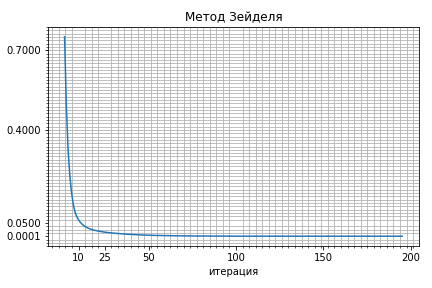

In [4]:
%matplotlib widget
start = 1
plt.plot(np.arange(len(rs[start:])) + 1 + start, np.array(rs[start:]))
plt.xlabel("итерация")
plt.ylabel("невязка")
plt.title("Метод Зейделя")
plt.tight_layout()
plt.minorticks_on()
plt.grid(True, "minor")
plt.xticks([10, 25, 50, 100, 150, 200])
plt.yticks([0.0001, 0.05, 0.4, 0.7])
# plt.show()
plt.savefig("discrepancy.eps")

9 10 V: [ 1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  0.  -0.1 -0.2 -0.3
 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1. ]
19 W [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


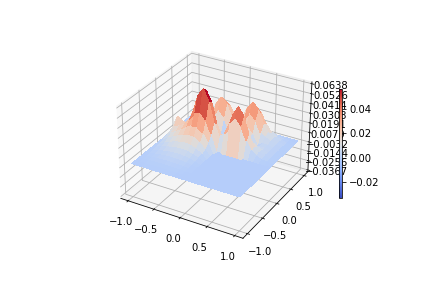

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
%matplotlib inline
%matplotlib widget

v = np.linspace(1, -1, N1 + N2 + 2)
print(N1, N2, "V:", v)
w = np.linspace(-1, 1, M1 + 2)
print(M1, "W", w)
X, Y = np.meshgrid(w, v)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, uFormed, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=30)
# plt.show()
plt.savefig("u3d.eps")

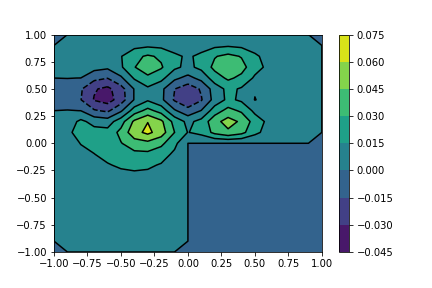

In [6]:
%matplotlib inline
%matplotlib widget

cs = plt.contourf(X, Y, uFormed)
plt.contour(cs, colors='k')
plt.colorbar(cs)

# plt.show()
plt.savefig("u2d.eps")